## Demo of spatio-temporal clustering algorithms

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os

In [12]:
import st_clustering as stc

### Exemplary data

In [13]:
df = pd.read_csv('test-data.csv')
df.head()

,time,animal_id,x,y
0,0,0,201.623002,186.148565
1,0,1,247.658670,177.650135
2,0,2,127.457230,20.572136
3,0,3,231.180722,172.861323
4,0,4,217.739517,189.203565


In [14]:
# normalize the data 
df['x'] = (df['x'] - df['x'].min()) / (df['x'].max() - df['x'].min())
df['y'] = (df['y'] - df['y'].min()) / (df['y'].max() - df['y'].min())
# transform to numpy array
data = df.loc[:, ['time','x','y']].values

### Fit

The method `st_fit` filters the distance matrix of data points using a temporal distance parameter, `eps2` and then calls the clustering algorithm.

For more details, please refer to the original [paper](https://scibib.dbvis.de/uploadedFiles/Cakmak_ST_Clustering_Benchmark.pdf).

In [15]:
# in this demo, we choose ST_DBSCAN as clustering algorithm
st_dbscan = stc.ST_DBSCAN(eps1 = 0.05, eps2 = 10, min_samples = 2)

# however, you can also choose: 
# ST_DBSCAN, ST_Agglomerative, ST_OPTICS, ST_SpectralClustering, ST_AffinityPropagation, ST_HDBSCAN

In [16]:
st_dbscan.st_fit(data)

ST_DBSCAN(eps1=0.05, min_samples=2)

In [17]:
def plot(data, labels):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    
    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]
        
        clust = data[np.where(labels==i)]
        plt.scatter(clust[:,0], clust[:,1], c=[col], s=1)
    plt.show()

    return None

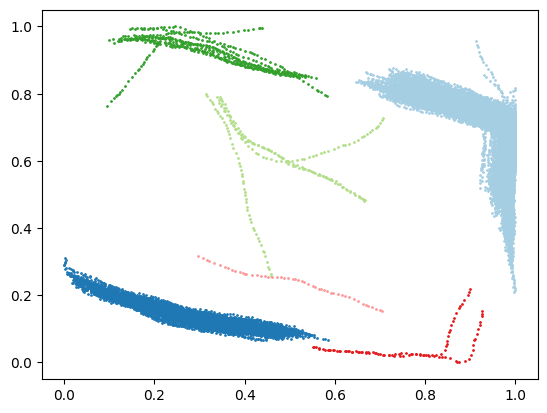

In [18]:
plot(data[:,1:], st_dbscan.labels)

#### Memory Error

To process large-scale datasets, use the `st_fit_frame_split` method that splits the dataset into frames and loads them sequentially into memory. Afterwards, the clustering results of these subsets are merged.

For more details, please refer to the original [paper](https://scibib.dbvis.de/uploadedFiles/Cakmak_ST_Clustering_Benchmark.pdf).

In [19]:
st_dbscan = stc.ST_DBSCAN(eps1 = 0.05, eps2 = 10, min_samples = 3)
st_dbscan.st_fit_frame_split(data, frame_size = 10)

ST_DBSCAN(eps1=0.05, min_samples=3)

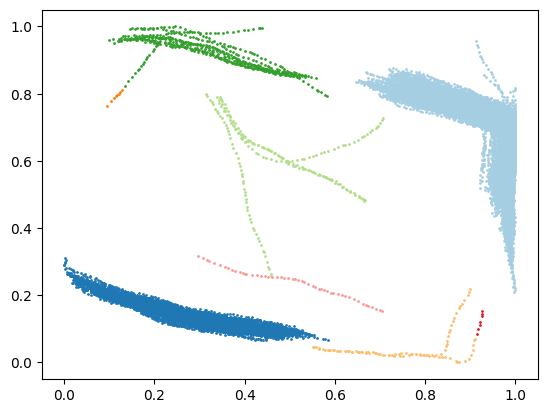

In [20]:
plot(data[:,1:], st_dbscan.labels)